# k-Nearest Neighbors algorithm(KNN)

----------------------------------------------Concept---------------------------------------------------------------

this algorithm has two step:

1)calculate the distance of a new data point to all other training data points.
The distance could be :
*Euclidean
*Manhattan
....

2)selects the K(arbitary) nearest data points.

3)
it assigns the data point to the class to which the majority of the K data points belong.

Pros:
    1) It is extremely easy to implement
    2) It is lazy learning algorithm and therefore.requires no training prior to making real time predictions. 
    3) Since the algorithm requires no training before making predictions, new data can be added seamlessly.
    4) There are only two parameters required to implement KNN(K and the distance function)

Cons
    1)It does not work well with high dimensional data because of ditance calculation time.
    2)It does  not work well with categorical features because finding the distance between dimensions with categorical features is difficult.

----------------------------------------------Implementation-------------------------------------------------------

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

dt=pd.read_csv(iris_url)
dt= dt.set_axis(['Sepal_Lenght',
                   'Sepal_Width',
                   'Petal-Length',
                   'Petal-Width',
                   'Target'], axis=1, inplace=False)

In [2]:
dt.head()

,Sepal_Lenght,Sepal_Width,Petal-Length,Petal-Width,Target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
X=dt.iloc[:,:-1]
Y=dt.iloc[:,4]
# split data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)

In [4]:
# scale to normalize data
st_scaler=StandardScaler()
st_scaler.fit(X_train)

X_train=st_scaler.transform(X_train)
X_test=st_scaler.transform(X_test)

In [5]:
# train
clf_knn=KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [6]:
# predict
Y_pred = clf_knn.predict(X_test)


In [7]:
# Evaluate
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[11  0  0]
 [ 0 19  2]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45



Text(0, 0.5, 'False predictions ')

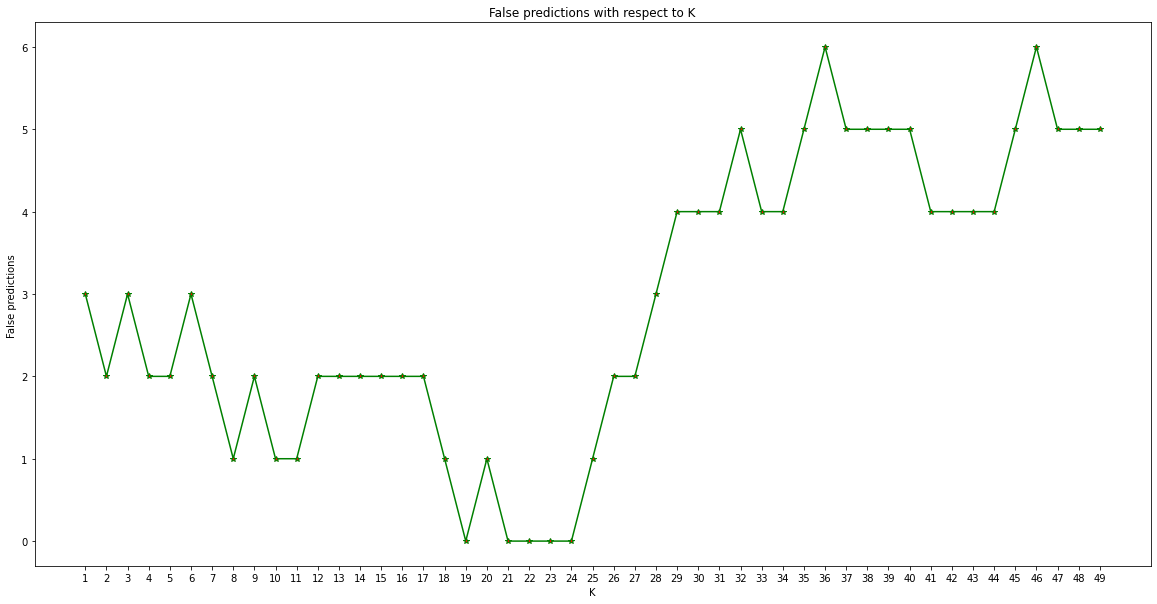

In [14]:
# find best k
false_predictions=[]
k_range=range(1, 50)
for i in k_range:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,Y_train)
    pred=clf.predict(X_test)
    false_predictions.append(sum(pred!=Y_test))

plt.figure(figsize=(20,10))
plt.plot(k_range, false_predictions, color='green', marker='*',markerfacecolor='red')
plt.title('False predictions with respect to K')
plt.xlabel('K')
plt.xticks(k_range,k_range)   
plt.ylabel('False predictions ')


In [ ]:
lowest false predition number is when k is between 21 nd 24